In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/limited_india_plastic_usage.csv")
df

,Year,Region,State,District,Population,Plastic Waste (kg),Plastic Type,Source
0,2015,India,Karnataka,Siliguri,3873614,11281.518277,Other,Packaging
1,2020,India,Karnataka,Howrah,9447578,47063.618026,Other,Household
2,2022,India,Nagaland,Varanasi,219600,2793.547594,PP,Packaging
3,2016,India,Nagaland,Siliguri,5080591,16013.925691,PP,Packaging
4,2018,India,Gujarat,Varanasi,5929496,6310.392474,PVC,Packaging
...,...,...,...,...,...,...,...,...
4995,2015,India,Gujarat,Howrah,677526,32380.749668,PP,Household
4996,2020,India,Gujarat,Howrah,286768,38958.680105,PP,Packaging
4997,2019,India,Gujarat,Varanasi,1438231,29034.433025,Other,Household
4998,2021,India,Gujarat,Varanasi,5790017,48247.130954,PP,Industrial


In [3]:
df.head()

,Year,Region,State,District,Population,Plastic Waste (kg),Plastic Type,Source
0,2015,India,Karnataka,Siliguri,3873614,11281.518277,Other,Packaging
1,2020,India,Karnataka,Howrah,9447578,47063.618026,Other,Household
2,2022,India,Nagaland,Varanasi,219600,2793.547594,PP,Packaging
3,2016,India,Nagaland,Siliguri,5080591,16013.925691,PP,Packaging
4,2018,India,Gujarat,Varanasi,5929496,6310.392474,PVC,Packaging


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                5000 non-null   int64  
 1   Region              5000 non-null   object 
 2   State               5000 non-null   object 
 3   District            5000 non-null   object 
 4   Population          5000 non-null   int64  
 5   Plastic Waste (kg)  5000 non-null   float64
 6   Plastic Type        5000 non-null   object 
 7   Source              5000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 312.6+ KB


In [5]:
df.describe()

,Year,Population,Plastic Waste (kg)
count,5000.000000,5.000000e+03,5000.000000
mean,2019.452200,5.003359e+06,25034.303049
std,2.903963,2.911643e+06,14104.308475
min,2015.000000,5.017800e+04,1003.325196
25%,2017.000000,2.475362e+06,12739.620689
50%,2019.000000,5.028150e+06,24824.661659
75%,2022.000000,7.555456e+06,37093.531063
max,2024.000000,9.998433e+06,49996.375125


In [6]:
df.isnull().sum()

,0
Year,0
Region,0
State,0
District,0
Population,0
Plastic Waste (kg),0
Plastic Type,0
Source,0


In [7]:
def takeAction(x):
  if(x>25000):
    return "Yes"
  else:
    return 'No'

df['Take Action'] = df['Plastic Waste (kg)'].map(takeAction)
df.head()

,Year,Region,State,District,Population,Plastic Waste (kg),Plastic Type,Source,Take Action
0,2015,India,Karnataka,Siliguri,3873614,11281.518277,Other,Packaging,No
1,2020,India,Karnataka,Howrah,9447578,47063.618026,Other,Household,Yes
2,2022,India,Nagaland,Varanasi,219600,2793.547594,PP,Packaging,No
3,2016,India,Nagaland,Siliguri,5080591,16013.925691,PP,Packaging,No
4,2018,India,Gujarat,Varanasi,5929496,6310.392474,PVC,Packaging,No


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['State', 'District', 'Plastic Type', 'Source', 'Take Action']:
  df[i] = le.fit_transform(df[i])

df.head()

,Year,Region,State,District,Population,Plastic Waste (kg),Plastic Type,Source,Take Action
0,2015,India,1,1,3873614,11281.518277,0,2,0
1,2020,India,1,0,9447578,47063.618026,0,0,1
2,2022,India,2,2,219600,2793.547594,1,2,0
3,2016,India,2,1,5080591,16013.925691,1,2,0
4,2018,India,0,2,5929496,6310.392474,2,2,0


In [9]:
df.drop(columns=['Region'], inplace = True)
df.head()

,Year,State,District,Population,Plastic Waste (kg),Plastic Type,Source,Take Action
0,2015,1,1,3873614,11281.518277,0,2,0
1,2020,1,0,9447578,47063.618026,0,0,1
2,2022,2,2,219600,2793.547594,1,2,0
3,2016,2,1,5080591,16013.925691,1,2,0
4,2018,0,2,5929496,6310.392474,2,2,0


In [10]:
x = df.iloc[:, 0:7]
x

,Year,State,District,Population,Plastic Waste (kg),Plastic Type,Source
0,2015,1,1,3873614,11281.518277,0,2
1,2020,1,0,9447578,47063.618026,0,0
2,2022,2,2,219600,2793.547594,1,2
3,2016,2,1,5080591,16013.925691,1,2
4,2018,0,2,5929496,6310.392474,2,2
...,...,...,...,...,...,...,...
4995,2015,0,0,677526,32380.749668,1,0
4996,2020,0,0,286768,38958.680105,1,2
4997,2019,0,2,1438231,29034.433025,0,0
4998,2021,0,2,5790017,48247.130954,1,1


In [11]:
y = df['Take Action']
y

,Take Action
0,0
1,1
2,0
3,0
4,0
...,...
4995,1
4996,1
4997,1
4998,1


In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [14]:
ypred = model.predict(xtest)

In [15]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Absolute Error: 0.20786911359317878
R-squared Score: 0.7477033141430878


[]

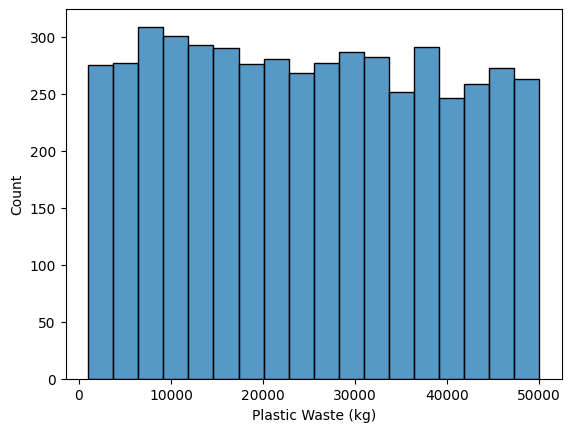

In [16]:
sns.histplot(df["Plastic Waste (kg)"])
plt.plot()